<a href="https://colab.research.google.com/github/And2300/Trash/blob/main/mixing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# P1
https://www.analyticssteps.com/blogs/how-does-basic-convolution-work-image-processing

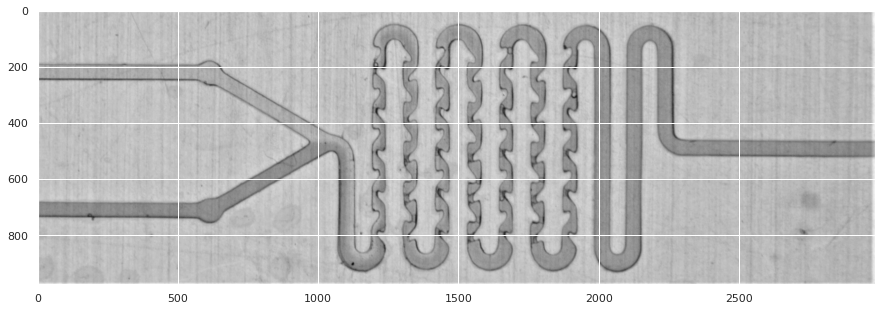

In [26]:
path = 'DSC_0003.jpg'
im = cv2.imread(path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im = cv2.resize(im, (100,100))
im.shape

plt.figure(figsize=(15,12))
plt.imshow(im, cmap='gray')

In [38]:
kernel = np.array([
    [1/16, 1/8, 1/16],
    [1/8 , 1/4, 1/8],
    [1/16, 1/8, 1/16],
]) # Gaussian Blur

In [40]:
kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1],
]) # Vertical Edge

In [42]:
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
]) # Outline

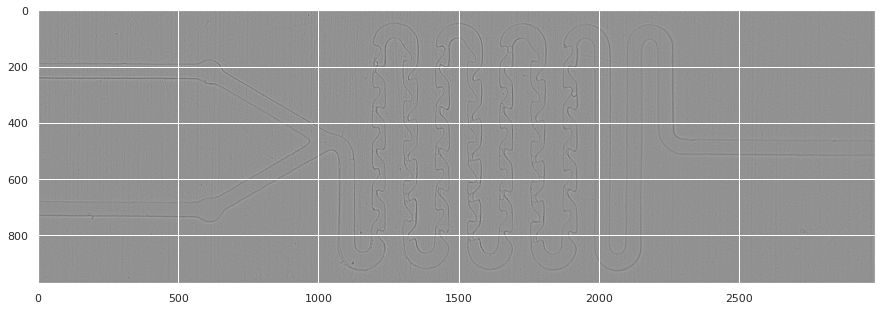

In [43]:
convolved_image = np.zeros((im.shape[0] - kernel.shape[0] + 1, im.shape[1] - kernel.shape[1] + 1))
convolved_image.shape

for i in range(convolved_image.shape[0]):
    for j in range(convolved_image.shape[1]):
        patch = im[i:i+kernel.shape[0], j:j+kernel.shape[1]]
        hprod = (patch * kernel).sum()
        convolved_image[i,j] = hprod

plt.figure(figsize=(15,12))
plt.imshow(convolved_image, cmap='gray')  

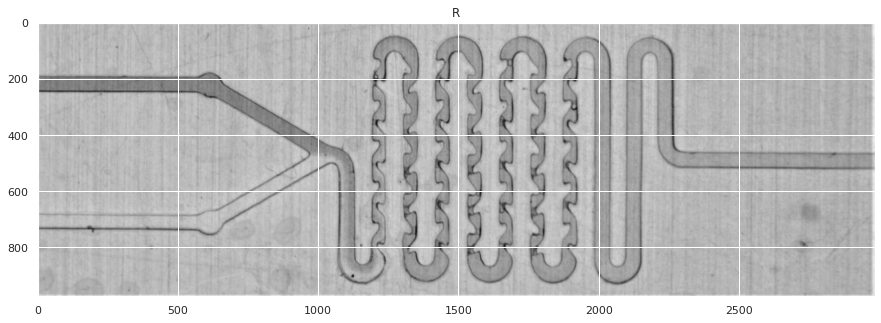

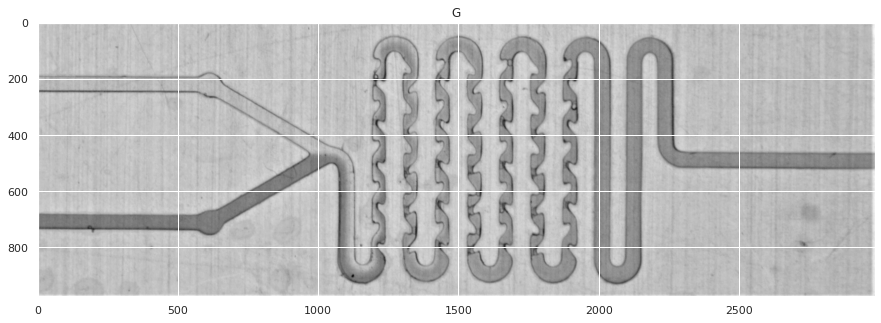

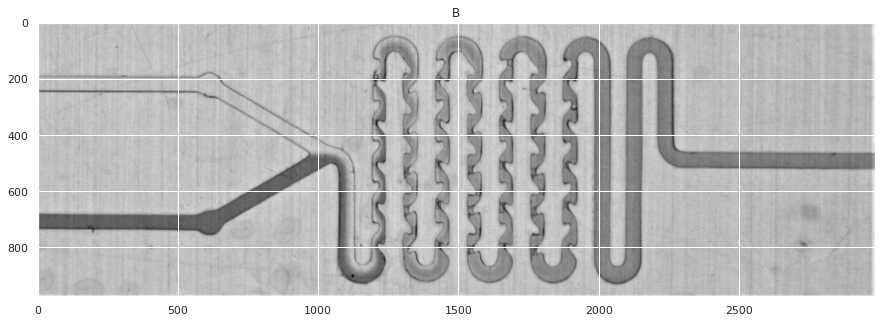

In [22]:
im = cv2.imread(path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

for i in range(3):
    plt.figure(i, figsize=(15,12))
    plt.title("RGB"[i])
    plt.imshow(im[:,:,i], cmap='gray')

# P2
https://towardsdatascience.com/convolution-neural-network-for-image-processing-using-keras-dc3429056306

In [10]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

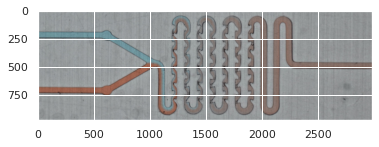

(975, 2985, 3)

In [11]:
# Read the image
image = cv2.imread(path) #--imread() helps in loading an image into jupyter including its pixel values
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
image.shape

In [12]:
image[0][0]

array([190, 187, 183], dtype=uint8)

Original Image:


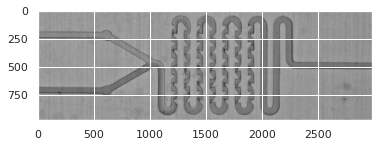

(975, 2985)

In [14]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print('Original Image:')
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
gray.shape

In [15]:
import numpy as np
data = np.array(gray)
flattened = data.flatten()
flattened.shape

(2910375,)

In [16]:
flattened

array([186, 187, 188, ..., 179, 178, 176], dtype=uint8)

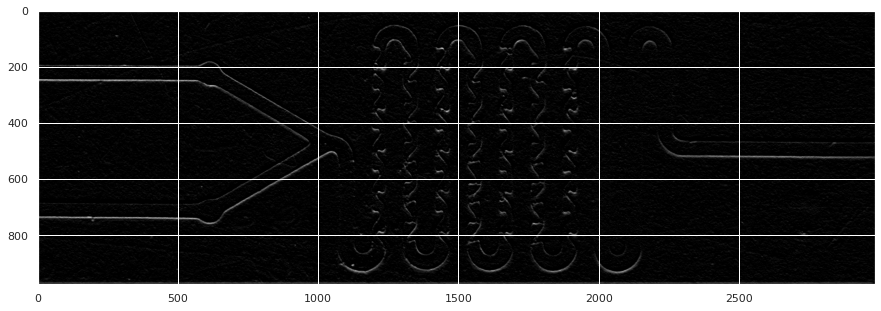

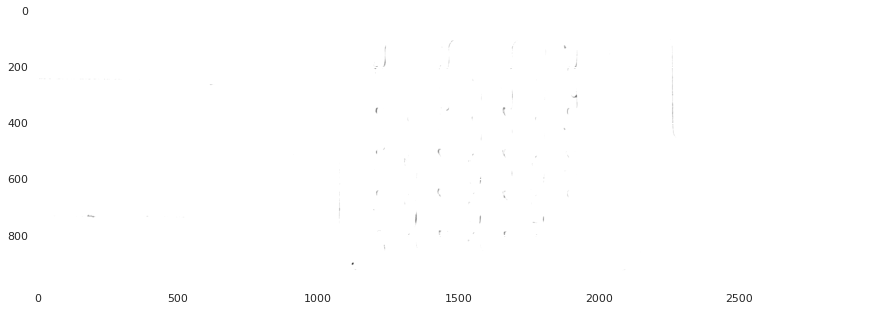

In [33]:
# 3x3 array for edge detection
mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
mat_x = np.array([[ -1, 0, 1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

plt.figure(figsize=(15,12))
filtered_image = cv2.filter2D(gray, -1, mat_y)
plt.imshow(filtered_image, cmap='gray')

plt.figure(figsize=(15,12))
filtered_image = cv2.filter2D(gray, -1, mat_x)
plt.imshow(filtered_image, cmap='gray')

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as fn

In [35]:
import numpy as np
filter_vals = np.array([[-1, -1, 1, 2], [-1, -1, 1, 0], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)
# Neural network with one convolutional layer and four filters
class Net(nn.Module):
 
 def __init__(self, weight): #Declaring a constructor to initialize the class variables
    super(Net, self).__init__()
    # Initializes the weights of the convolutional layer to be the weights of the 4 defined filters
    k_height, k_width = weight.shape[2:]
    # Assumes there are 4 grayscale filters; We declare the CNN layer here. Size of the kernel equals size of the filter
    # Usually the Kernels are smaller in size
    self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
    self.conv.weight = torch.nn.Parameter(weight)
 
    def forward(self, x):
        # Calculates the output of a convolutional layer pre- and post-activation
        conv_x = self.conv(x)
        activated_x = fn.relu(conv_x)
        # Returns both layers
        return conv_x, activated_x

# Instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)
# Print out the layer in the network
print(model)

Filter shape:  (4, 4)


NameError: ignored

In [36]:
def visualization_layer(layer, n_filters= 4):
    
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # Grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))